SMS SPAM DETECTION


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter 

loading data from .txt file

In [2]:
df = pd.read_csv("SMSSpamCollection.txt", sep="\t", header=None, names=["label", "message"])
df


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [19]:
df.dropna(inplace = True)
print(df.head())

  label                                            message  message_length
0   ham  Go until jurong point, crazy.. Available only ...             111
1   ham                      Ok lar... Joking wif u oni...              29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...             155
3   ham  U dun say so early hor... U c already then say...              49
4   ham  Nah I don't think he goes to usf, he lives aro...              61


In [20]:
df['label_num'] = df['label'].map({'ham':0, 'spam':1})

In [21]:
df['message_length']= df['message'].apply(len)

average length of spam message: 138.6706827309237
average length of ham message: 71.48248704663213


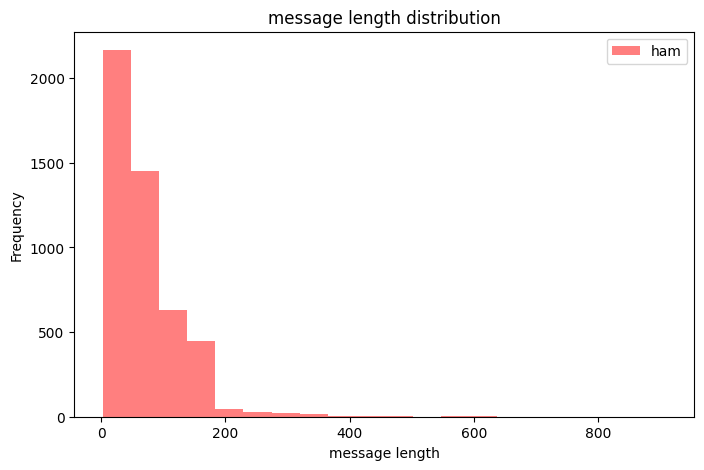

In [28]:
print("average length of spam message:", df[df['label'] == 'spam']['message_length'].mean())
print('average length of ham message:',df[df['label']== 'ham']['message_length'].mean())

plt.figure(figsize=(8,5))
df[df['label']== 'ham']['message_length'].plot(kind= 'hist',bins = 20, color = 'red', alpha = 0.5, label = 'ham')
plt.legend()
plt.title("message length distribution")
plt.xlabel("message length")
plt.show()

In [33]:
stopwords = ["the","is","in","to","a","and","on","for","of","you","your","i","it","this","that","with"]

def clean_message(msg):
    msg = msg.lower()
    msg = msg.translate(str.maketrans('','',string.punctuation))
    words = msg.split()
    return [word for word in words if word.isalpha() and word not in stopwords]

spam_words = []
ham_words = []

for msg in df[df['label'] == 'spam']['message']:
    spam_words.extend(clean_message(msg))

for msg in df[df['label']== 'ham']['message']:
    ham_words.extend(clean_message(msg))

spam_common = Counter(spam_words).most_common(10)
ham_common = Counter(ham_words).most_common(10)

print("top 10 most common spam words", spam_common)
print("top 10 most common ham words", ham_common)

top 10 most common spam words [('call', 347), ('free', 216), ('now', 189), ('or', 188), ('txt', 150), ('u', 147), ('ur', 144), ('have', 135), ('from', 128), ('mobile', 123)]
top 10 most common ham words [('u', 985), ('me', 761), ('my', 747), ('im', 451), ('have', 441), ('but', 425), ('so', 413), ('not', 412), ('are', 410), ('at', 379)]


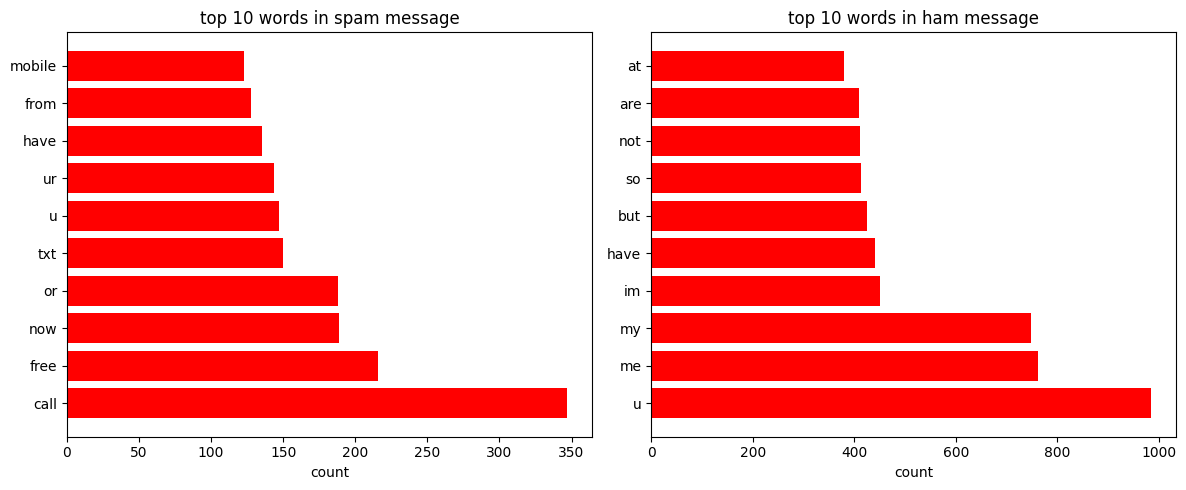

In [37]:
spam_df = pd.DataFrame(spam_common,columns =['word','count'])
ham_df = pd.DataFrame(ham_common,columns =['word','count'])

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.barh(spam_df['word'],spam_df['count'],color = 'red')
plt.title("top 10 words in spam message")
plt.xlabel("count")

plt.subplot(1,2,2)
plt.barh(ham_df['word'],ham_df['count'],color = 'red')
plt.title("top 10 words in ham message")
plt.xlabel("count")

plt.tight_layout()
plt.show()

In [38]:
sns.set(style="whitegrid")


C:\Users\Shreeya\AppData\Local\Temp\ipykernel_29136\1083865271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= 'label', palette='pastel')


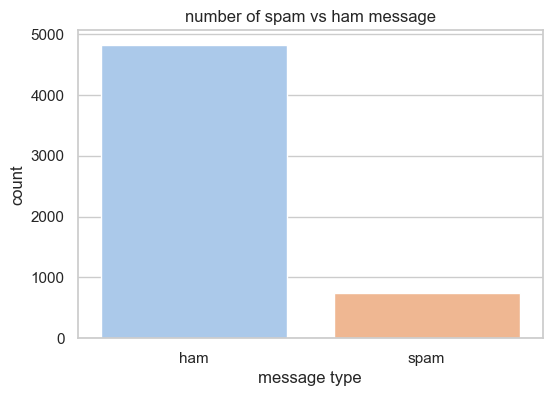

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x= 'label', palette='pastel')
plt.title("number of spam vs ham message")
plt.xlabel("message type")
plt.ylabel("count")
plt.show()

C:\Users\Shreeya\AppData\Local\Temp\ipykernel_29136\4141901036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x ='label',


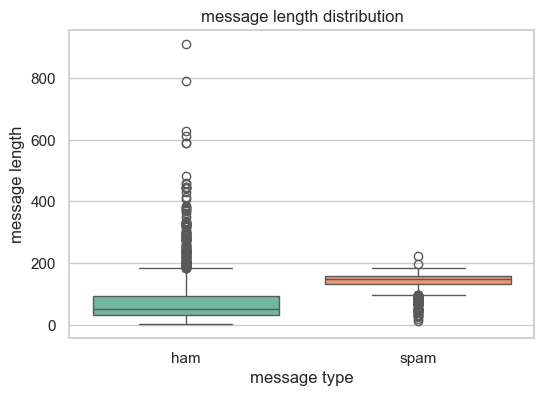

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x ='label',
            y='message_length', palette='Set2')
plt.title("message length distribution")
plt.xlabel("message type")
plt.ylabel("message length")
plt.show()

In [44]:
df['word_count']= df['message'].apply(lambda x : len(str(x).split()))

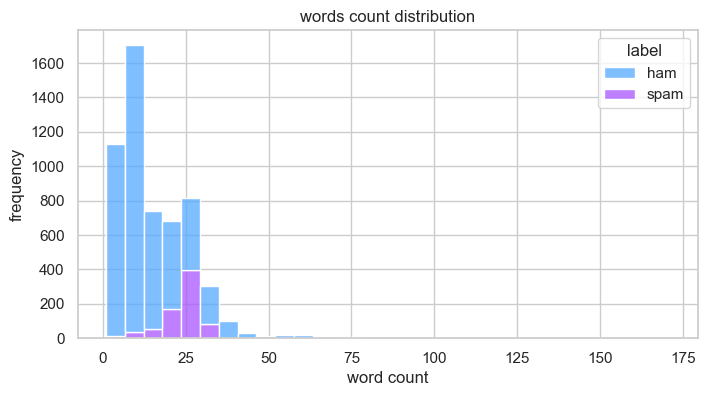

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(data = df, x='word_count',hue='label',multiple='stack',bins=30,palette='cool')
plt.title("words count distribution")
plt.xlabel("word count")
plt.ylabel("frequency")
plt.show()

C:\Users\Shreeya\AppData\Local\Temp\ipykernel_29136\2854909959.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x='label',y='message_length',palette='Set3')


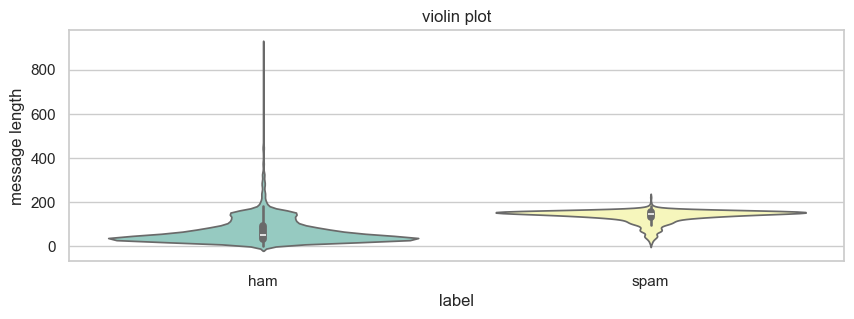

In [46]:
plt.figure(figsize=(10,3))
sns.violinplot(data = df, x='label',y='message_length',palette='Set3')
plt.title("violin plot")
plt.xlabel("label")
plt.ylabel("message length")
plt.show()

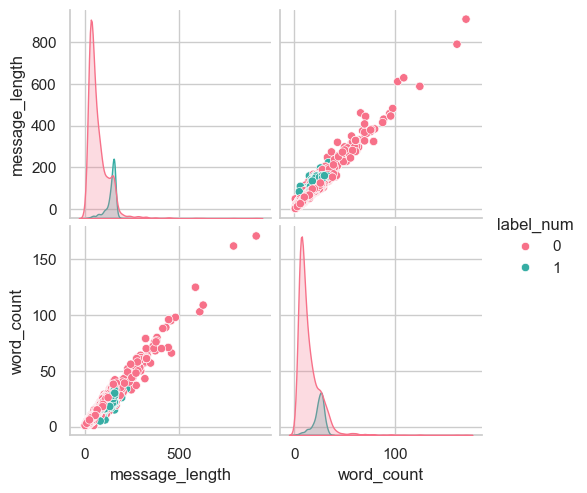

In [47]:
num_df = df[['message_length','word_count','label_num']]
sns.pairplot(num_df, hue='label_num',palette='husl')
plt.show()